In [1]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,roc_curve,auc,classification_report,f1_score,confusion_matrix


from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
#load the diabestic patient dataset and check out first five columns

data = pd.read_csv(r'C:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\diabestes_prediction\Diabestes_patient_data\diabetic_data.csv')
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
#check the info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [18]:
my_dict = {}

for i in data.columns:
    my_dict[i] = data[i].dtype.base
print(my_dict)


{'encounter_id': dtype('int64'), 'patient_nbr': dtype('int64'), 'race': dtype('O'), 'gender': dtype('O'), 'age': dtype('O'), 'weight': dtype('O'), 'admission_type_id': dtype('int64'), 'discharge_disposition_id': dtype('int64'), 'admission_source_id': dtype('int64'), 'time_in_hospital': dtype('int64'), 'payer_code': dtype('O'), 'medical_specialty': dtype('O'), 'num_lab_procedures': dtype('int64'), 'num_procedures': dtype('int64'), 'num_medications': dtype('int64'), 'number_outpatient': dtype('int64'), 'number_emergency': dtype('int64'), 'number_inpatient': dtype('int64'), 'diag_1': dtype('O'), 'diag_2': dtype('O'), 'diag_3': dtype('O'), 'number_diagnoses': dtype('int64'), 'max_glu_serum': dtype('O'), 'A1Cresult': dtype('O'), 'metformin': dtype('O'), 'repaglinide': dtype('O'), 'nateglinide': dtype('O'), 'chlorpropamide': dtype('O'), 'glimepiride': dtype('O'), 'acetohexamide': dtype('O'), 'glipizide': dtype('O'), 'glyburide': dtype('O'), 'tolbutamide': dtype('O'), 'pioglitazone': dtype('O

In [19]:
num_col = []

for col in data.columns:
    if data[col].dtype !='O':
        num_col.append(col)

print(num_col)

['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [4]:
# check statistical description of dataset

data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [5]:
# check for any duplicate values in the dataset

data.duplicated().sum()

np.int64(0)

In [6]:
#check the dimension of the dataset

data.shape

(101766, 50)

In [3]:
#we can see that we null values are shown as '?" in the dataset. lets replace them with nan

data.replace({'?': np.nan},inplace=True)


[Text(0.5, 1.0, 'Missing Data'),
 Text(0.5, 23.38159722222222, 'Coulmns'),
 Text(50.722222222222214, 0.5, 'Data Points')]

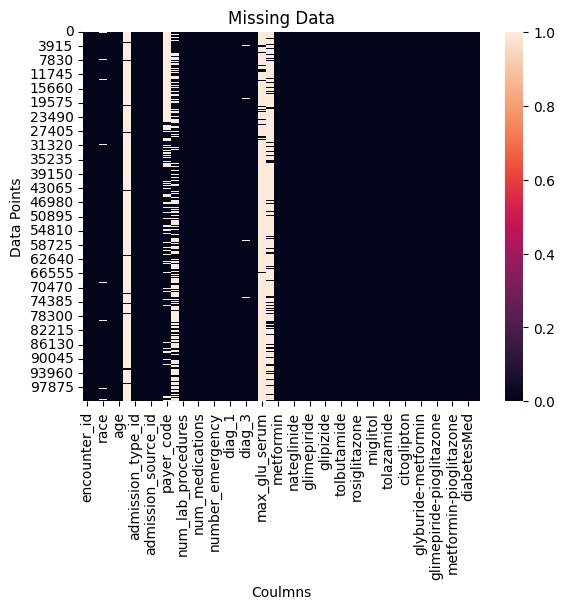

In [8]:
# check heatmap missing data points

sns.heatmap(data.isnull()).set(title = 'Missing Data', xlabel = 'Coulmns', ylabel ='Data Points')

In [9]:
#check columns having missing values more than 40000 rows which is close to 40%

for i in data.columns:
    if data[i].isna().sum()>40000:
        print(i)

weight
payer_code
medical_specialty
max_glu_serum
A1Cresult


In [10]:
#check unique values in each column

data.nunique()

encounter_id                101766
patient_nbr                  71518
race                             5
gender                           3
age                             10
weight                           9
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      17
medical_specialty               72
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         716
diag_2                         748
diag_3                         789
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [4]:
#we can find that columns 'weight','payer_code','medical_specialty','max_glu_serum','A1Cresult' having missing values greater than 40000
#we can see that columns 'encounter_id','diag_1','diag_2','daig_3','examide','citoglipton' and 'patient_nbr' has large number of unique values 
# we can drop these columns as they are not going to add much more value to the prediction

features_drop_list = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'acetohexamide', 'tolbutamide','diag_1',
                      'diag_2','diag_3']

print(f"The dimension of dataset before droppoing columns is {data.shape}")
data.drop(columns=features_drop_list,axis=1,inplace=True)
print(f"The dimension of dataset after droppoing columns  is {data.shape}")


The dimension of dataset before droppoing columns is (101766, 50)
The dimension of dataset after droppoing columns  is (101766, 26)


In [5]:
#check list of remaining columns in the dataset

data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
# check race column

data['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [7]:
#check gender column

data['gender'].value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [15]:
#replace unknown category with majority class which is female

data['gender'] = data['gender'].replace('Unknown/Invalid',0)
data['gender'] = data['gender'].replace('Female',0)
data['gender'] = data['gender'].replace('Male',1)
data['gender'].value_counts()

C:\Users\gthatava\AppData\Local\Temp\ipykernel_26004\1707460654.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace('Male',1)


gender
0    54711
1    47055
Name: count, dtype: int64

In [16]:
#handle age cloumn

data['age'].value_counts()

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

In [ ]:
# perform encoding on age column

data['age'] = data['age'].replace('[70-80)',75)
data['age'] = data['age'].replace('[60-70)',65)
data['age'] = data['age'].replace('[50-60)',55)
data['age'] = data['age'].replace('[80-90)',75)
data['age'] = data['age'].replace('[40-50)',45)
data['age'] = data['age'].replace('[30-40)',35)
data['age'] = data['age'].replace('[90-100)',95)
data['age'] = data['age'].replace('[20-30)',25)
data['age'] = data['age'].replace('[10-20)',15)
data['age'] = data['age'].replace("'[0-10)',5")

data['age'].value_counts()

C:\Users\gthatava\AppData\Local\Temp\ipykernel_26004\584060120.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['age'] = data['age'].replace('[0-10)',5)


age
75    43265
65    22483
55    17256
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: count, dtype: int64

In [3]:
data['max_glu_serum'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 101766 entries, 0 to 101765
Series name: max_glu_serum
Non-Null Count  Dtype 
--------------  ----- 
5346 non-null   object
dtypes: object(1)
memory usage: 795.2+ KB


In [18]:
#handle max_glu_serum column

data['max_glu_serum'].value_counts()

max_glu_serum
Norm    2597
>200    1485
>300    1264
Name: count, dtype: int64

In [19]:
#perform encoding on 'max_glu_serum' column

data['max_glu_serum'] = data['max_glu_serum'].replace('Norm',int(0))
data['max_glu_serum'] = data['max_glu_serum'].replace('>200',int(1))
data['max_glu_serum'] = data['max_glu_serum'].replace('>300',int(2))

data['max_glu_serum'].value_counts()

C:\Users\gthatava\AppData\Local\Temp\ipykernel_26004\3986723754.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['max_glu_serum'] = data['max_glu_serum'].replace('>300',int(2))


max_glu_serum
0.0    2597
1.0    1485
2.0    1264
Name: count, dtype: int64

In [20]:
#perform encoding on 'A1Cresult'

data['A1Cresult'].value_counts()

A1Cresult
>8      8216
Norm    4990
>7      3812
Name: count, dtype: int64

In [21]:
#perform encoding

data['A1Cresult'] = data['A1Cresult'].replace('>8',2)
data['A1Cresult'] = data['A1Cresult'].replace('Norm',0)
data['A1Cresult'] = data['A1Cresult'].replace('>7',1)


data['A1Cresult'].value_counts()

C:\Users\gthatava\AppData\Local\Temp\ipykernel_26004\71630366.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['A1Cresult'] = data['A1Cresult'].replace('>7',1)


A1Cresult
2.0    8216
0.0    4990
1.0    3812
Name: count, dtype: int64

HANDLE DRUG COLUMN


1.metformin
2.glimepiride
3.glipizide
4.glyburide
5.pioglitazone
6.rosiglitazone
7.insulin


In [22]:
#check any one column

data['metformin'].value_counts()

metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64

In [23]:
# perform encoding on drug columns

drug_list = ['metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']

for i in drug_list:

    data[i] = data[i].replace('No' , 0)
    data[i] = data[i].replace('Steady', 2)
    data[i] = data[i].replace('Down', 1)
    data[i] = data[i].replace('Up', 3)

data['metformin'].value_counts()

C:\Users\gthatava\AppData\Local\Temp\ipykernel_26004\4020131500.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[i] = data[i].replace('Up', 3)


metformin
0    81778
2    18346
3     1067
1      575
Name: count, dtype: int64

In [24]:
#check change column

data['change'].value_counts()

change
No    54755
Ch    47011
Name: count, dtype: int64

In [25]:
#perform encoding

data['change'] = data['change'].replace('No',0)
data['change'] = data['change'].replace('Ch',1)

data['change'].value_counts()

C:\Users\gthatava\AppData\Local\Temp\ipykernel_26004\2409454743.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['change'] = data['change'].replace('Ch',1)


change
0    54755
1    47011
Name: count, dtype: int64

In [26]:
#handle diabetesMed column

data['diabetesMed'].value_counts()

diabetesMed
Yes    78363
No     23403
Name: count, dtype: int64

In [27]:
#perform encoding

data['diabetesMed'] = data['diabetesMed'].replace('Yes',1)
data['diabetesMed'] = data['diabetesMed'].replace('No',0)

data['diabetesMed'].value_counts()


C:\Users\gthatava\AppData\Local\Temp\ipykernel_26004\4253785055.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diabetesMed'] = data['diabetesMed'].replace('No',0)


diabetesMed
1    78363
0    23403
Name: count, dtype: int64

In [28]:
#check race column

data['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [29]:
#perform encoding

data['race'] = data['race'].replace({'Caucasian':0,'AfricanAmerican':1,'Hispanic':2,'Asian':3,'Other':4})

data['race'].value_counts()

C:\Users\gthatava\AppData\Local\Temp\ipykernel_26004\3619925519.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['race'] = data['race'].replace({'Caucasian':0,'AfricanAmerican':1,'Hispanic':2,'Asian':3,'Other':4})


race
0.0    76099
1.0    19210
2.0     2037
4.0     1506
3.0      641
Name: count, dtype: int64

In [30]:
#check null values in the dataset

data.isnull().sum()

race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
glimepiride                     0
glipizide                       0
glyburide                       0
pioglitazone                    0
rosiglitazone                   0
insulin                         0
change                          0
diabetesMed                     0
readmitted                      0
dtype: int64

In [31]:
#columns max_glu_serum and A1Cresult has large missing values ,so we can drop them

data = data.drop(columns=['max_glu_serum', 'A1Cresult'], axis=1)

data.isnull().sum()

race                        2273
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
number_diagnoses               0
metformin                      0
glimepiride                    0
glipizide                      0
glyburide                      0
pioglitazone                   0
rosiglitazone                  0
insulin                        0
change                         0
diabetesMed                    0
readmitted                     0
dtype: int64

In [32]:
#we can see lot of missing values under race column
#replace null values in race column with most frequent values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy ='most_frequent')

data['race']=imputer.fit_transform(data[['race']])

data.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
metformin                   0
glimepiride                 0
glipizide                   0
glyburide                   0
pioglitazone                0
rosiglitazone               0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64

In [33]:
#check unique values of column readmitted
#print count of each category in the readmitted columns

print(data['readmitted'].unique())
print(data['readmitted'].value_counts())

['NO' '>30' '<30']
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


In [34]:
#perform label encoding on readmitted columns

data['readmitted']=data['readmitted'].replace({'>30':1,'<30':1,'NO':0})
data['readmitted'].value_counts()

C:\Users\gthatava\AppData\Local\Temp\ipykernel_26004\35912727.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['readmitted']=data['readmitted'].replace({'>30':1,'<30':1,'NO':0})


readmitted
0    54864
1    46902
Name: count, dtype: int64

### MODEL BUILDING

In [35]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'metformin', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [36]:
#X,Y split
X = data.drop(columns=['readmitted'],axis=1)
y = data[['readmitted']]

print(X.columns)

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'metformin', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed'],
      dtype='object')


In [37]:
#check datatypes of each column in dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   race                      101766 non-null  float64
 1   gender                    101766 non-null  int64  
 2   age                       101766 non-null  int64  
 3   admission_type_id         101766 non-null  int64  
 4   discharge_disposition_id  101766 non-null  int64  
 5   admission_source_id       101766 non-null  int64  
 6   time_in_hospital          101766 non-null  int64  
 7   num_lab_procedures        101766 non-null  int64  
 8   num_procedures            101766 non-null  int64  
 9   num_medications           101766 non-null  int64  
 10  number_outpatient         101766 non-null  int64  
 11  number_emergency          101766 non-null  int64  
 12  number_inpatient          101766 non-null  int64  
 13  number_diagnoses          101766 non-null  i

In [38]:
col =[]

for i in data.columns:
    if data[i].dtype == 'O':
        col .append(i)
print(col)

[]


In [39]:
X.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
metformin                   0
glimepiride                 0
glipizide                   0
glyburide                   0
pioglitazone                0
rosiglitazone               0
insulin                     0
change                      0
diabetesMed                 0
dtype: int64

In [40]:
#perform train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(101766, 23)
(81412, 23)
(20354, 23)


In [41]:
#perform train and validation split

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_val.shape)

(65129, 23)
(16283, 23)


In [42]:
#perform standardization of all columns in train,test and validation data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [43]:
#check performance of various models on the dataset

#Naive Bayes
print('\nGaussian Naive Bayes Performance:')
nbm = GaussianNB()
nbm.fit(X_train,y_train)
nbm_pred = nbm.predict(X_val)
print('F1 Score        : ', f1_score(y_val, nbm_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, nbm_pred))




Gaussian Naive Bayes Performance:
F1 Score        :  0.6014862126143831
Confusion Matrix:
  [[7779 1014]
 [5475 2015]]


c:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\diabestes_prediction\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
#check performance of various models on the dataset


#KNN
print('\nK-Nearest Neighbor Initial Performance:')
knn = KNeighborsClassifier() 
knn.fit(X_train_scaled,y_train)
knn_pred = knn.predict(X_val_scaled)
print('F1 Score        : ', f1_score(y_val, knn_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_pred))





K-Nearest Neighbor Initial Performance:


c:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\diabestes_prediction\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


F1 Score        :  0.5818952281520604
Confusion Matrix:
  [[5672 3121]
 [3687 3803]]


In [45]:
#Randon Forest
print('\nRandom Forest initial Performance:')
rfm = RandomForestClassifier() 
rfm.fit(X_train,y_train)
rfm_pred = rfm.predict(X_val)
print('F1 Score        : ', f1_score(y_val, rfm_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, rfm_pred))


Random Forest initial Performance:


c:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\diabestes_prediction\venv\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


F1 Score        :  0.633237118467113
Confusion Matrix:
  [[6268 2525]
 [3447 4043]]


In [46]:
#Gradient Boosting
print('\nGradient Boost initial Performance:')
gbm = GradientBoostingClassifier() 
gbm.fit(X_train,y_train)
gbm_pred = gbm.predict(X_val)
print('F1 Score        : ', f1_score(y_val, gbm_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, gbm_pred))


Gradient Boost initial Performance:


c:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\diabestes_prediction\venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score        :  0.6391942516735245
Confusion Matrix:
  [[6668 2125]
 [3750 3740]]


In [47]:
#check performance of various models on the dataset
#SVM
from sklearn.linear_model import LogisticRegression
print('\n Logistic Regression Performance:')
lr = LogisticRegression() 
lr.fit(X_train_scaled,y_train)
lr_pred = lr.predict(X_val_scaled)
print('F1 Score        : ', f1_score(y_val, lr_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lr_pred))


 Logistic Regression Performance:
F1 Score        :  0.6231038506417736
Confusion Matrix:
  [[7096 1697]
 [4440 3050]]


c:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\diabestes_prediction\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Initialize the model
gbm = GradientBoostingClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gbm,
                           param_grid=param_grid,
                           scoring='f1_micro',  # or 'accuracy', 'roc_auc', etc.
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)




Fitting 5 folds for each of 54 candidates, totalling 270 fits


c:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\diabestes_prediction\venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best F1 Score: 0.6414500430705103


In [49]:
# Evaluate on validation set
best_model = grid_search.best_estimator_
gbm_pred = best_model.predict(X_val)
print('Validation F1 Score:', f1_score(y_val, gbm_pred, average='micro'))
print('Confusion Matrix:\n', confusion_matrix(y_val, gbm_pred))

Validation F1 Score: 0.646993797211816
Confusion Matrix:
 [[6470 2323]
 [3425 4065]]


In [6]:
data = pd.read_csv(r'C:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\diabestes_prediction\Diabestes_patient_data\diabetic_data.csv')
df = pd.read_csv(r'C:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\diabestes_prediction\Artifacts\07_08_2025_23_23_39\data_ingestion\feature_store\diabetic_data.csv')
train = pd.read_csv(r'C:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\diabestes_prediction\Artifacts\07_08_2025_23_23_39\data_ingestion\ingested\train.csv')
test = pd.read_csv(r'C:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\diabestes_prediction\Artifacts\07_08_2025_23_23_39\data_ingestion\ingested\test.csv')
print(data.shape)
print(df.shape)
print(train.shape)
print(test.shape)

(101766, 50)
(101766, 50)
(81412, 50)
(20354, 50)


In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv(r"C:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\Diabetes_prediction\Artifacts\07_26_2025_12_01_12\data_validation\validated\test.csv")
data.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,184095846,21720627,Caucasian,Male,[80-90),?,1,1,7,5,...,No,No,No,No,No,No,No,No,No,NO
1,87593544,8175627,AfricanAmerican,Female,[20-30),?,1,6,7,3,...,No,No,No,No,No,No,No,No,Yes,NO
2,165666228,58419477,Caucasian,Male,[50-60),?,1,1,7,7,...,No,No,No,No,No,No,No,No,No,NO
3,38192994,77119362,Caucasian,Male,[60-70),?,1,6,7,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,67678878,56188107,?,Male,[70-80),[50-75),1,6,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,106394682,23220162,AfricanAmerican,Male,[60-70),?,1,1,7,6,...,No,Up,No,No,No,No,No,Ch,Yes,>30
6,24581916,138168,AfricanAmerican,Female,[80-90),?,1,6,7,2,...,No,No,No,No,No,No,No,Ch,Yes,>30
7,170133420,80071605,Caucasian,Female,[70-80),?,2,1,1,4,...,No,Down,No,No,No,No,No,Ch,Yes,>30
8,94862124,17353728,Caucasian,Male,[50-60),?,2,1,1,1,...,No,No,No,No,No,No,No,No,No,NO
9,366738794,85403556,Caucasian,Female,[70-80),?,2,22,1,2,...,No,No,No,No,No,No,No,No,No,<30


In [5]:
print(data.shape)
data = data.iloc[:20,:]
print(data.shape)

(20354, 50)
(20, 50)


In [6]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,184095846,21720627,Caucasian,Male,[80-90),?,1,1,7,5,...,No,No,No,No,No,No,No,No,No,NO
1,87593544,8175627,AfricanAmerican,Female,[20-30),?,1,6,7,3,...,No,No,No,No,No,No,No,No,Yes,NO
2,165666228,58419477,Caucasian,Male,[50-60),?,1,1,7,7,...,No,No,No,No,No,No,No,No,No,NO
3,38192994,77119362,Caucasian,Male,[60-70),?,1,6,7,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,67678878,56188107,?,Male,[70-80),[50-75),1,6,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [7]:
data = data.drop(columns=['readmitted'],axis=1)
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,184095846,21720627,Caucasian,Male,[80-90),?,1,1,7,5,...,No,No,No,No,No,No,No,No,No,No
1,87593544,8175627,AfricanAmerican,Female,[20-30),?,1,6,7,3,...,No,No,No,No,No,No,No,No,No,Yes
2,165666228,58419477,Caucasian,Male,[50-60),?,1,1,7,7,...,No,No,No,No,No,No,No,No,No,No
3,38192994,77119362,Caucasian,Male,[60-70),?,1,6,7,12,...,No,No,Steady,No,No,No,No,No,Ch,Yes
4,67678878,56188107,?,Male,[70-80),[50-75),1,6,7,10,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [9]:
data.to_csv(r"C:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\Diabetes_prediction\valid_data\test_data.csv")

In [1]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [8]:
c =0

while c<11:
    if c%2==0:
        print(c)
    c+=1
    

0
2
4
6
8
10


In [9]:
def get_percentage(marks):
    return (marks/600)*100


gangadhar = get_percentage(511)
print(gangadhar)

85.16666666666667


In [14]:
my_list = ["apple", "banana", "grape","banana","banana","banana"]

# Insert "cherry" at index 1
my_list.insert(1, "cherry")
print(my_list)
print(my_list.index("banana"))
print(my_list.count("banana"))


['apple', 'cherry', 'banana', 'grape', 'banana', 'banana', 'banana']
2
4


In [11]:
print(my_list)
my_list.clear()
print(my_list)

['apple', 'cherry', 'banana', 'grape']
[]


In [16]:
# Filter even numbers from a list
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

def is_even(num):
    return num % 2 != 0

even_numbers_iterator = filter(is_even, numbers)
even_numbers_list = list(even_numbers_iterator)
print(even_numbers_list)

[1, 3, 5, 7, 9]


In [17]:
    def outer_function():
        enclosing_var = "Hello"
        def inner_function():
            nonlocal enclosing_var
            enclosing_var = "World"
            print(enclosing_var)
        inner_function()
        print(enclosing_var)
    outer_function()

World
World


In [19]:
global_var = 20 # This is a global variable
    
#print(global_var)
def modify_global():
    global global_var
    global_var = 30
    #print(global_var)

print(global_var)
modify_global()
print(global_var)

20
30


In [20]:
def modify_immutable(num):
    num = num + 10  # Reassigns 'num' to a new integer object
    print(f"Inside function (immutable): {num}")

my_int = 5
modify_immutable(my_int)
print(f"Outside function (immutable): {my_int}")

Inside function (immutable): 15
Outside function (immutable): 5


In [21]:
def modify_mutable(my_list):
    my_list.append(4)  # Modifies the original list object
    print(f"Inside function (mutable): {my_list}")

original_list = [1, 2, 3]
modify_mutable(original_list)
print(f"Outside function (mutable): {original_list}")

Inside function (mutable): [1, 2, 3, 4]
Outside function (mutable): [1, 2, 3, 4]


In [22]:
import pandas as pd

data = pd.read_csv(r"C:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\Diabetes_prediction\Artifacts\07_26_2025_12_01_12\data_validation\validated\test.csv")
data.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,184095846,21720627,Caucasian,Male,[80-90),?,1,1,7,5,...,No,No,No,No,No,No,No,No,No,NO
1,87593544,8175627,AfricanAmerican,Female,[20-30),?,1,6,7,3,...,No,No,No,No,No,No,No,No,Yes,NO
2,165666228,58419477,Caucasian,Male,[50-60),?,1,1,7,7,...,No,No,No,No,No,No,No,No,No,NO
3,38192994,77119362,Caucasian,Male,[60-70),?,1,6,7,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,67678878,56188107,?,Male,[70-80),[50-75),1,6,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
5,106394682,23220162,AfricanAmerican,Male,[60-70),?,1,1,7,6,...,No,Up,No,No,No,No,No,Ch,Yes,>30
6,24581916,138168,AfricanAmerican,Female,[80-90),?,1,6,7,2,...,No,No,No,No,No,No,No,Ch,Yes,>30
7,170133420,80071605,Caucasian,Female,[70-80),?,2,1,1,4,...,No,Down,No,No,No,No,No,Ch,Yes,>30
8,94862124,17353728,Caucasian,Male,[50-60),?,2,1,1,1,...,No,No,No,No,No,No,No,No,No,NO
9,366738794,85403556,Caucasian,Female,[70-80),?,2,22,1,2,...,No,No,No,No,No,No,No,No,No,<30


In [24]:
print(data.shape)
data = data.iloc[0:21,:]
print(data.shape)

(20354, 50)
(21, 50)


In [26]:
import numpy as np
data.replace({'?': np.nan},inplace=True)

In [27]:
COLUMNS_DROP = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 
                'repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'troglitazone',
                  'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin',
                    'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 
                    'acetohexamide', 'tolbutamide','diag_1','diag_2','diag_3','max_glu_serum', 'A1Cresult','readmitted']

print(data.shape)
data.drop(columns = COLUMNS_DROP,axis=1,inplace=True)
print(data.shape)

(21, 50)
(21, 23)


In [28]:
data["gender"]=data["gender"].replace({'Unknown/Invalid':0,'Female':0,'Male' : 1})
data["age"]=data["age"].replace({'[70-80)':75,
                                                                                     '[60-70)':65,
                                                                                     '[50-60)':55,
                                                                                     '[80-90)':75,
                                                                                     '[40-50)':45,
                                                                                     '[30-40)':35,
                                                                                     '[90-100)':95,
                                                                                     '[20-30)':25,
                                                                                     '[10-20)':15,
                                                                                     '[0-10)':5})
data["race"]=data["race"].replace({'Caucasian':0,'AfricanAmerican':1,'Hispanic':2,'Asian':3,'Other':4})

C:\Users\gthatava\AppData\Local\Temp\ipykernel_22468\2149129660.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["gender"]=data["gender"].replace({'Unknown/Invalid':0,'Female':0,'Male' : 1})
C:\Users\gthatava\AppData\Local\Temp\ipykernel_22468\2149129660.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["age"]=data["age"].replace({'[70-80)':75,
C:\Users\gthatava\AppData\Local\Temp\ipykernel_22468\2149129660.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version.

In [29]:
data.to_csv(r"C:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\Diabetes_prediction\valid_data\valid_data.csv")